In [50]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [51]:
uv_melb_21 = "uv-melbourne-2021.csv"
uv_melb_20 = "uv-melbourne-2020.csv"
uv_melb_19 = "uv-melbourne-2019.csv"
uv_melb_18 = "uv-melbourne-2018.csv"
uv_melb_17 = "uv-melbourne-2017.csv"

uv_melb_21_df = pd.read_csv(uv_melb_21, encoding="UTF-8")
uv_melb_20_df = pd.read_csv(uv_melb_20, encoding="UTF-8")
uv_melb_19_df = pd.read_csv(uv_melb_19, encoding="UTF-8")
uv_melb_18_df = pd.read_csv(uv_melb_18, encoding="UTF-8")
uv_melb_17_df = pd.read_csv(uv_melb_17, encoding="UTF-8")

In [52]:
#Removing Lat and Lon for Melbourne cvs. Splitting date to time, year, month and day
uv_melb_17_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_melb_17_df[['Date','Time']] = uv_melb_17_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_melb_17_df[["year", "month", "day"]] = uv_melb_17_df["Date"].str.split("-", expand = True)
uv_melb_17_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_melb_17_df

uv_melb_18_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_melb_18_df[['Date','Time']] = uv_melb_18_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_melb_18_df[["year", "month", "day"]] = uv_melb_18_df["Date"].str.split("-", expand = True)
uv_melb_18_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_melb_18_df

uv_melb_19_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_melb_19_df[['Date','Time']] = uv_melb_19_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_melb_19_df[["year", "month", "day"]] = uv_melb_19_df["Date"].str.split("-", expand = True)
uv_melb_19_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_melb_19_df

uv_melb_20_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_melb_20_df[['Date','Time']] = uv_melb_20_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_melb_20_df[["year", "month", "day"]] = uv_melb_20_df["Date"].str.split("-", expand = True)
uv_melb_20_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_melb_20_df

uv_melb_21_df.drop(['Lat',"Lon"], axis=1, inplace=True)
uv_melb_21_df[['Date','Time']] = uv_melb_21_df['Date-Time'].str.split(' ', n=1, expand=True)
uv_melb_21_df[["day", "month", "year"]] = uv_melb_21_df["Date"].str.split("/", expand = True)
uv_melb_21_df.drop(['Date-Time', 'Date'], axis=1, inplace=True)
uv_melb_21_df

,UV_Index,Time,day,month,year
0,0.01,0:00,1,01,2021
1,0.01,0:01,1,01,2021
2,0.01,0:02,1,01,2021
3,0.01,0:03,1,01,2021
4,0.01,0:04,1,01,2021
...,...,...,...,...,...
525304,0.01,23:55,31,12,2021
525305,0.01,23:56,31,12,2021
525306,0.01,23:57,31,12,2021
525307,0.01,23:58,31,12,2021


In [53]:
uv_melb_17_df['day'] = uv_melb_17_df['day'].astype(int)

#Obtaining UV index average per month for 2017
#Data time taken between 8am to 8pm to remove outliers of nighttime data
#As Tasmania has daylight savings, data up to 8pm used to capture daylight in the summer
uv_melb_17_df['hour'] = pd.to_datetime(uv_melb_17_df['Time'], format='%H:%M:%S').dt.hour
clean_melb17 = uv_melb_17_df[(uv_melb_17_df['hour'] >= 8) & (uv_melb_17_df['hour'] <=20)]
clean_melb17

month_uv17 = clean_melb17.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv17 = pd.DataFrame(month_uv17)
monthmean_uv17

,month,UV_Index
0,01,4.360256
1,02,3.566450
2,03,2.784733
3,04,1.371998
4,05,0.737462
5,06,0.496523
6,07,0.565975
7,08,0.814953
8,09,1.256966
9,10,2.206124


In [54]:
#Obtaining UV index average per month for 2018
uv_melb_18_df['hour'] = pd.to_datetime(uv_melb_18_df['Time'], format='%H:%M:%S').dt.hour
clean_melb18 = uv_melb_18_df[(uv_melb_18_df['hour'] >= 8) & (uv_melb_18_df['hour'] <=20)]
clean_melb18

month_uv18 = clean_melb18.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv18 = pd.DataFrame(month_uv18)
monthmean_uv18

#Obtaining UV index average per month for 2019
uv_melb_19_df['hour'] = pd.to_datetime(uv_melb_19_df['Time'], format='%H:%M:%S').dt.hour
clean_melb19 = uv_melb_19_df[(uv_melb_19_df['hour'] >= 8) & (uv_melb_19_df['hour'] <=20)]
clean_melb19

month_uv19 = clean_melb19.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv19 = pd.DataFrame(month_uv19)
monthmean_uv19

#Obtaining UV index average per month for 2020
uv_melb_20_df['hour'] = pd.to_datetime(uv_melb_20_df['Time'], format='%H:%M:%S').dt.hour
clean_melb20 = uv_melb_20_df[(uv_melb_20_df['hour'] >= 8) & (uv_melb_20_df['hour'] <=20)]
clean_melb20

month_uv20 = clean_melb20.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv20 = pd.DataFrame(month_uv20)
monthmean_uv20

#Obtaining UV index average per month for 2021
uv_melb_21_df['hour'] = pd.to_datetime(uv_melb_21_df['Time'], format='%H:%M').dt.hour
clean_melb21 = uv_melb_21_df[(uv_melb_21_df['hour'] >= 8) & (uv_melb_21_df['hour'] <=20)]
clean_melb21

month_uv21 = clean_melb21.groupby('month', as_index=False, sort=False)['UV_Index'].mean()
monthmean_uv21 = pd.DataFrame(month_uv21)
monthmean_uv21

,month,UV_Index
0,01,4.040616
1,02,3.509348
2,03,2.213519
3,04,1.325934
4,05,0.778368
5,06,0.495145
6,07,0.552655
7,08,0.924196
8,09,1.601830
9,10,2.280466


In [55]:
#Combining dataframes from each year together
merge_df = pd.merge(monthmean_uv17, monthmean_uv18, on="month", how="outer")

merge_df = merge_df.rename(columns={"UV_Index_x":"UV_mean_2017",
                                    "UV_Index_y":"UV_mean_2018"})

merge_df

,month,UV_mean_2017,UV_mean_2018
0,01,4.360256,4.109917
1,02,3.566450,3.551894
2,03,2.784733,2.527083
3,04,1.371998,1.383458
4,05,0.737462,0.622742
5,06,0.496523,0.447807
6,07,0.565975,0.527611
7,08,0.814953,0.793664
8,09,1.256966,1.427120
9,10,2.206124,2.215733


In [56]:
merge_df1 = pd.merge(merge_df, monthmean_uv19, on="month", how="outer")

merge_df1 = merge_df1.rename(columns={"UV_Index":"UV_mean_2019"})

merge_df1

,month,UV_mean_2017,UV_mean_2018,UV_mean_2019
0,01,4.360256,4.109917,4.311693
1,02,3.566450,3.551894,3.474033
2,03,2.784733,2.527083,2.352934
3,04,1.371998,1.383458,1.375867
4,05,0.737462,0.622742,0.702488
5,06,0.496523,0.447807,0.498009
6,07,0.565975,0.527611,0.532087
7,08,0.814953,0.793664,0.859036
8,09,1.256966,1.427120,1.393584
9,10,2.206124,2.215733,2.338907


In [57]:
merge_df2 = pd.merge(merge_df1, monthmean_uv20, on="month", how="outer")

merge_df2 = merge_df2.rename(columns={"UV_Index":"UV_mean_2020"})

merge_df2 

,month,UV_mean_2017,UV_mean_2018,UV_mean_2019,UV_mean_2020
0,01,4.360256,4.109917,4.311693,3.824065
1,02,3.566450,3.551894,3.474033,3.150677
2,03,2.784733,2.527083,2.352934,2.461663
3,04,1.371998,1.383458,1.375867,1.416239
4,05,0.737462,0.622742,0.702488,0.796963
5,06,0.496523,0.447807,0.498009,0.610079
6,07,0.565975,0.527611,0.532087,0.602444
7,08,0.814953,0.793664,0.859036,0.917722
8,09,1.256966,1.427120,1.393584,1.587133
9,10,2.206124,2.215733,2.338907,2.052261


In [58]:
merge_df3 = pd.merge(merge_df2, monthmean_uv21, on="month", how="outer")

merge_df3 = merge_df3.rename(columns={"UV_Index":"UV_mean_2021"})

merge_df3

,month,UV_mean_2017,UV_mean_2018,UV_mean_2019,UV_mean_2020,UV_mean_2021
0,01,4.360256,4.109917,4.311693,3.824065,4.040616
1,02,3.566450,3.551894,3.474033,3.150677,3.509348
2,03,2.784733,2.527083,2.352934,2.461663,2.213519
3,04,1.371998,1.383458,1.375867,1.416239,1.325934
4,05,0.737462,0.622742,0.702488,0.796963,0.778368
5,06,0.496523,0.447807,0.498009,0.610079,0.495145
6,07,0.565975,0.527611,0.532087,0.602444,0.552655
7,08,0.814953,0.793664,0.859036,0.917722,0.924196
8,09,1.256966,1.427120,1.393584,1.587133,1.601830
9,10,2.206124,2.215733,2.338907,2.052261,2.280466


In [59]:
merge_df3['mean'] = merge_df3.mean(axis=1)
melb_df = merge_df3
melb_df.to_csv("../Output/melb_df.csv", index=False, header=True)
melb_df

C:\Users\chris\AppData\Local\Temp/ipykernel_97632/3514100423.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merge_df3['mean'] = merge_df3.mean(axis=1)


,month,UV_mean_2017,UV_mean_2018,UV_mean_2019,UV_mean_2020,UV_mean_2021,mean
0,01,4.360256,4.109917,4.311693,3.824065,4.040616,4.129310
1,02,3.566450,3.551894,3.474033,3.150677,3.509348,3.450480
2,03,2.784733,2.527083,2.352934,2.461663,2.213519,2.467986
3,04,1.371998,1.383458,1.375867,1.416239,1.325934,1.374699
4,05,0.737462,0.622742,0.702488,0.796963,0.778368,0.727605
5,06,0.496523,0.447807,0.498009,0.610079,0.495145,0.509512
6,07,0.565975,0.527611,0.532087,0.602444,0.552655,0.556154
7,08,0.814953,0.793664,0.859036,0.917722,0.924196,0.861914
8,09,1.256966,1.427120,1.393584,1.587133,1.601830,1.453326
9,10,2.206124,2.215733,2.338907,2.052261,2.280466,2.218698


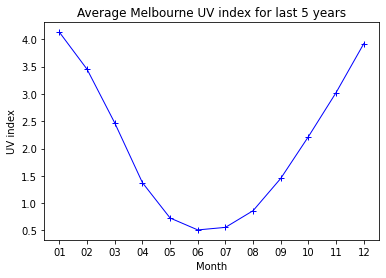

In [60]:
#Plotting graph and saving graph image to Image folder
plt.plot(merge_df3['month'], merge_df3['mean'], marker="+", color="blue", linewidth=1)
plt.xlabel("Month")
plt.ylabel("UV index")
plt.title("Average Melbourne UV index for last 5 years")
plt.savefig("../Images/MelbourneUV.png")

In [61]:
#Finding max UV index for hour of day for each year
hour_uv17 = uv_melb_17_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv18 = uv_melb_18_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv19 = uv_melb_19_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv20 = uv_melb_20_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()
hour_uv21 = uv_melb_21_df.groupby('hour', as_index=False, sort=False)['UV_Index'].max()

In [62]:
#Combining dataframes from each hour 
hour_merge = pd.merge(hour_uv17, hour_uv18, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index_x":"2017",
                                    "UV_Index_y":"2018"})

hour_merge

,hour,2017,2018
0,0,0.01,0.03
1,1,0.01,0.01
2,2,0.01,0.01
3,3,0.01,0.01
4,4,0.03,0.03
5,5,0.34,0.36
6,6,1.26,1.30
7,7,3.12,3.18
8,8,5.63,5.66
9,9,8.62,8.59


In [63]:
hour_merge = pd.merge(hour_merge, hour_uv19, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index":"2019"})

hour_merge

,hour,2017,2018,2019
0,0,0.01,0.03,0.03
1,1,0.01,0.01,0.02
2,2,0.01,0.01,0.02
3,3,0.01,0.01,0.01
4,4,0.03,0.03,0.03
5,5,0.34,0.36,0.35
6,6,1.26,1.30,1.26
7,7,3.12,3.18,3.05
8,8,5.63,5.66,5.48
9,9,8.62,8.59,8.77


In [64]:
hour_merge = pd.merge(hour_merge, hour_uv20, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index":"2020"})

hour_merge

,hour,2017,2018,2019,2020
0,0,0.01,0.03,0.03,0.01
1,1,0.01,0.01,0.02,0.02
2,2,0.01,0.01,0.02,0.03
3,3,0.01,0.01,0.01,0.02
4,4,0.03,0.03,0.03,0.03
5,5,0.34,0.36,0.35,0.39
6,6,1.26,1.30,1.26,1.38
7,7,3.12,3.18,3.05,3.24
8,8,5.63,5.66,5.48,5.88
9,9,8.62,8.59,8.77,8.76


In [65]:
hour_merge = pd.merge(hour_merge, hour_uv21, on="hour", how="outer")

hour_merge = hour_merge.rename(columns={"UV_Index":"2021"})

hour_merge

,hour,2017,2018,2019,2020,2021
0,0,0.01,0.03,0.03,0.01,0.01
1,1,0.01,0.01,0.02,0.02,0.01
2,2,0.01,0.01,0.02,0.03,0.01
3,3,0.01,0.01,0.01,0.02,0.01
4,4,0.03,0.03,0.03,0.03,0.03
5,5,0.34,0.36,0.35,0.39,0.33
6,6,1.26,1.30,1.26,1.38,1.23
7,7,3.12,3.18,3.05,3.24,2.87
8,8,5.63,5.66,5.48,5.88,5.44
9,9,8.62,8.59,8.77,8.76,9.49


In [68]:
#Produce mean column for max UV index scores for each hour of day
hour_merge['hour'] = hour_merge['hour'].astype(str)
hour_merge['mean'] = hour_merge.mean(axis=1)
melb_hour = hour_merge
melb_hour.to_csv("../Output/melb_hour.csv", index=False, header=True)
melb_hour

C:\Users\chris\AppData\Local\Temp/ipykernel_97632/123917965.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hour_merge['mean'] = hour_merge.mean(axis=1)


,hour,2017,2018,2019,2020,2021,mean
0,0,0.01,0.03,0.03,0.01,0.01,0.018
1,1,0.01,0.01,0.02,0.02,0.01,0.014
2,2,0.01,0.01,0.02,0.03,0.01,0.016
3,3,0.01,0.01,0.01,0.02,0.01,0.012
4,4,0.03,0.03,0.03,0.03,0.03,0.030
5,5,0.34,0.36,0.35,0.39,0.33,0.354
6,6,1.26,1.30,1.26,1.38,1.23,1.286
7,7,3.12,3.18,3.05,3.24,2.87,3.092
8,8,5.63,5.66,5.48,5.88,5.44,5.618
9,9,8.62,8.59,8.77,8.76,9.49,8.846


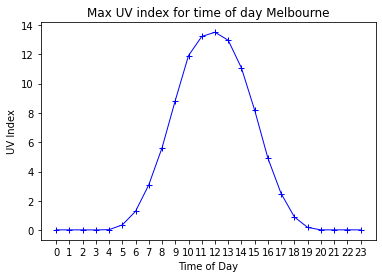

In [67]:
#Plotting graph and saving graph image to Image folder
plt.plot(melb_hour['hour'], melb_hour['mean'], marker="+", color="blue", linewidth=1)
plt.xlabel("Time of Day")
plt.ylabel("UV Index")
plt.title("Max UV index for time of day Melbourne")
plt.savefig("../Images/MelbHour.png")